# Prophet Forecasting on Nordic Electricity Consumption Data

Prophet is a new tool developed by the Facebook datascience team to make it easy to produce quality forecasts on timeseries data. I will in this notebook use Prophet to create a model based on previous Nordic Electricity consumption data to understand the dynamics of the data and predict future developments.  


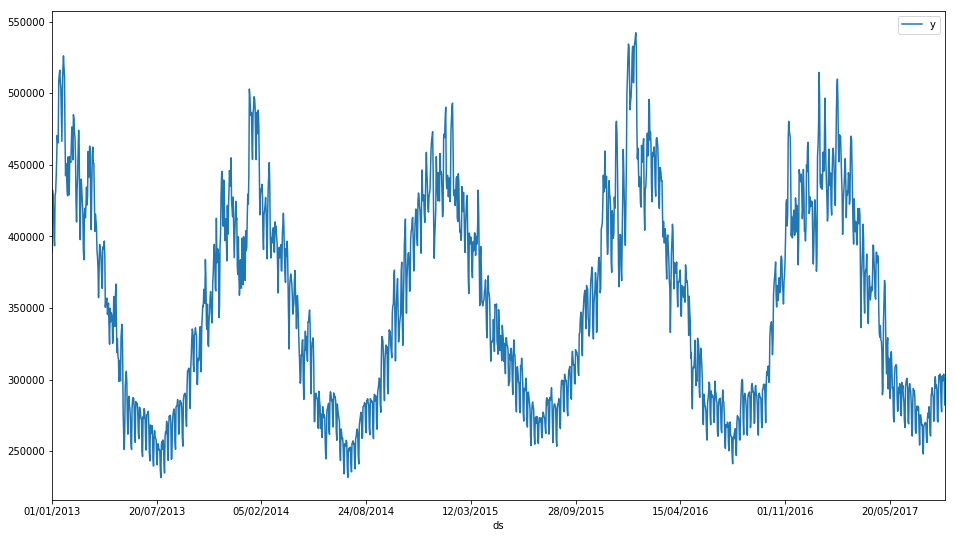

In [32]:
%matplotlib inline 
import pandas as pd
import numpy as np
from fbprophet import Prophet

# Read dataset from csv
df = pd.read_csv('../datasets/nordic_electricity_consumption_nordpool.csv')#, parse_dates=['Date'])

# Select desired data and format into format Prophet expects
area = 'NO'
df = df[['Date',area]]
df = df.rename(columns={'Date': 'ds', area: 'y'})

df.set_index('ds').plot(figsize=(16,9))

By plotting the raw data, we can see that it has predictable trend and seasonality components. The trend is slightly going upwards, peaks occur during winter, troughs during the summer. There is also a regular higher frequency component which could be due to subweekly variations. 

Lets see if Prophet can recognise and quantify these observations.   

In [38]:
# Initialise prophet and input data
m = Prophet()
m.fit(df)
#m.params

# Specify timeinterval to forecast (2 years)
future_data = m.make_future_dataframe(periods=730, freq='D')
forecast = m.predict(future_data)

The generated components can be plotted as follows:

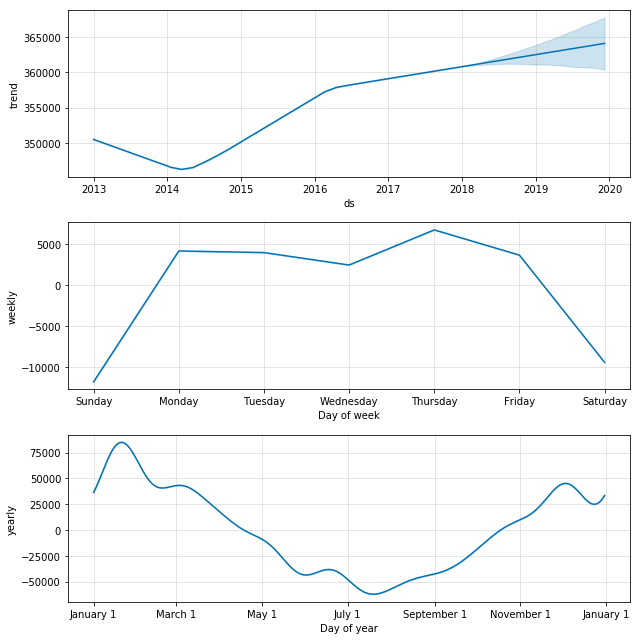

In [39]:
m.plot_components(forecast);

These show similar results to the observations made on the raw data. It shows large variation in electricity consumed during the weekend compared with weekdays, this is probably what is creating the higher frequency variations shown on the raw data. Another interesting observation is the trough occuring during christmas. It must be due to things shutting down due to the holidays. 

Using this information, the electricity consumption for the next two years can be predicted as shown in the plot below. 

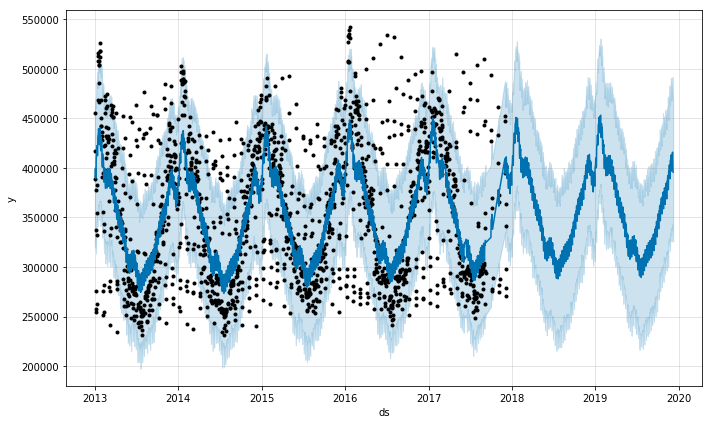

In [33]:
m.plot(forecast);

These results show that the forecast generated by Prophet can with a certain level of confidence predict future electricity consumption. However, 


- Future shifts in trend are difficult to predict.

- Weather conditions could influence the data. 

- Holidays - Prophet supports the addition of holidays to the model. Add this next. 